### Simulação do Cenário 1 - Opção 1

In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


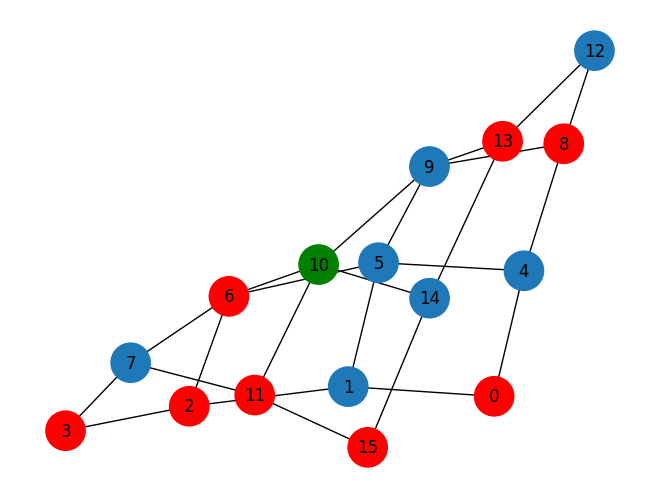

In [2]:
rede = Network()
controller = Controller(rede)

# Chamada corrigida para passar a topologia corretamente
rede.set_ready_topology('grade', 8, 4, 4, clients=[13,8,2,6,0,3,11,15], server=10)  # 8 clientes, 4x4 de topologia
rede.draw()
Logger.activate(Logger)

##### Nessa parte, eu posso gerar minha requesições, dos protocolos Childs(AC_BQC) e BFK_BQC.

##### O cenário 1 apresenta o agendamento das requesições de forma que pode-se executar protocolos em caminhos diferentes, porém no mesmo timeslot.

In [3]:
clientes = [13,8,2,6,0,3,11,15]

for _ in range(30):  # Escolha de quantas requisições serão feitas
    alice_id = random.choice(clientes)
    bob_id = 10
    num_qubits = 10
    num_gates = 20
    scenario = 1

    # Gere a requisição sem 'slice_path'
    request = rede.generate_request(
        alice_id=alice_id,
        bob_id=bob_id,
        num_qubits=num_qubits,
        num_gates=num_gates,
        scenario=scenario
    )
    controller.receive_request(request)

controller.process_requests()
controller.send_scheduled_requests()




          ┌───┐                              
q_0: ─────┤ X ├─────────────────────■────────
     ┌───┐└───┘        ┌───┐        │        
q_1: ┤ T ├───────■─────┤ X ├────■───┼───■────
     └───┘┌───┐  │     └─┬─┘    │ ┌─┴─┐ │    
q_2: ─────┤ Z ├──┼───────┼───■──┼─┤ X ├─┼────
          └───┘  │       │   │  │ └───┘ │    
q_3: ───────X────┼───────┼───┼──┼───X───┼──X─
            │    │       │   │  │   │   │  │ 
q_4: ──■────X────┼───■───┼───┼──┼───X───┼──┼─
       │  ┌───┐┌─┴─┐ │   │   │  │       │  │ 
q_5: ──┼──┤ Y ├┤ X ├─┼───■───┼──┼───────┼──X─
       │  └───┘└───┘ │       │  │       │    
q_6: ──┼─────────────■───────■──┼───────┼────
       │  ┌───┐┌───┐            │       │    
q_7: ──┼──┤ Y ├┤ Y ├─■──────────■───────┼────
       │  ├───┤└───┘ │                  │    
q_8: ──■──┤ X ├──────■──────────────────┼────
     ┌───┐└───┘                         │    
q_9: ┤ S ├──────────────────────────────■────
     └───┘                                   

2025-01-10 18:06:28,725: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:28,726: Instrução: {'operation': 't', 'qubits': [1]}
2025-01-10 18:06:28,726: Instrução: {'operation': 'cz', 'qubits': [8, 4]}
2025-01-10 18:06:28,727: Instrução: {'operation': 's', 'qubits': [9]}
2025-01-10 18:06:28,727: Instrução: {'operation': 'y', 'qubits': [7]}
2025-01-10 18:06:28,727: Instrução: {'operation': 'y', 'qubits': [7]}
2025-01-10 18:06:28,728: Instrução: {'operation': 'swap', 'qubits': [4, 3]}
2025-01-10 18:06:28,728: Instrução: {'operation': 'y', 'qubits': [5]}
2025-01-10 18:06:28,729: Instrução: {'operation': 'z', 'qubits': [2]}
2025-01-10 18:06:28,729: Instrução: {'operation': 'cx', 'qubits': [1, 5]}
2025-01-10 18:06:28,729: Instrução: {'operation': 'cz', 'qubits': [6, 4]}
2025-01-10 18:06:28,730: Instrução: {'operation': 'x', 'qubits': [8]}
2025-01-10 18:06:28,730: Instrução: {'operation': 'cz', 'qubits': [6, 2]}
2025-01-10 18:06:28,730: Instru


          ┌───┐                                  
q_0: ─────┤ Y ├──────────────X───■────■────■─────
          ├───┤              │   │    │    │     
q_1: ─────┤ Z ├──────X───────┼───┼────┼────┼───■─
          └───┘┌───┐ │       │   │  ┌─┴─┐  │   │ 
q_2: ───────■──┤ Z ├─┼───────┼───┼──┤ X ├──┼───■─
     ┌───┐  │  └───┘ │ ┌───┐ │ ┌─┴─┐└───┘  │     
q_3: ┤ X ├──┼────■───┼─┤ X ├─┼─┤ X ├───────┼─────
     ├───┤  │    │   │ ├───┤ │ └───┘       │     
q_4: ┤ Z ├──┼────┼───┼─┤ Y ├─┼─────────────┼─────
     └───┘  │    │   │ └───┘ │           ┌─┴─┐   
q_5: ───────┼────■───┼───────┼───────────┤ X ├───
            │        │       │           └───┘   
q_6: ───────┼────────┼───────┼───────────────────
     ┌───┐  │  ┌───┐ │ ┌───┐ │ ┌───┐             
q_7: ┤ H ├──┼──┤ X ├─┼─┤ Z ├─┼─┤ H ├─────────────
     └───┘  │  └───┘ │ └───┘ │ └───┘             
q_8: ───────┼────────┼───────X───────────────────
            │        │ ┌───┐                     
q_9: ───────■────────X─┤ Y ├─────────────────────

2025-01-10 18:06:28,875: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:28,875: Instrução: {'operation': 't', 'qubits': [6]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'z', 'qubits': [1]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'cz', 'qubits': [3, 5]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'cz', 'qubits': [8, 9]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'y', 'qubits': [9]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'cz', 'qubits': [8, 2]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'cx', 'qubits': [9, 1]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'swap', 'qubits': [4, 6]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'x', 'qubits': [6]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'cx', 'qubits': [5, 8]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'x', 'qubits': [8]}
2025-01-10 18:06:28,875: Instrução: {'operation': 'cz', 'qubits': [2, 1]}
2025-01-10 18:06:28,875

                  ┌───┐               
q_0: ───────────■─┤ Z ├───────────────
                │ └───┘               
q_1: ───────────┼─────────────────────
          ┌───┐ │ ┌───┐┌───┐┌───┐┌───┐
q_2: ─────┤ H ├─┼─┤ T ├┤ Y ├┤ X ├┤ X ├
          ├───┤ │ ├───┤└───┘└─┬─┘└───┘
q_3: ─────┤ X ├─┼─┤ H ├──■────┼───────
     ┌───┐├───┤ │ ├───┤  │    │       
q_4: ┤ X ├┤ T ├─┼─┤ Z ├──┼────┼───────
     └─┬─┘└───┘ │ └───┘  │    │       
q_5: ──┼────────┼────────┼────┼───────
       │  ┌───┐ │        │    │       
q_6: ──┼──┤ T ├─┼────────┼────┼───────
       │  ├───┤ │        │    │       
q_7: ──┼──┤ Z ├─■───X────┼────■───────
       │  ├───┤     │    │  ┌───┐     
q_8: ──■──┤ T ├─────┼────■──┤ S ├─────
          ├───┤     │  ┌───┐└───┘     
q_9: ─────┤ X ├─────X──┤ X ├──────────
          └───┘        └───┘          
                    ┌───┐     ┌───┐               
q_0: ────────────■──┤ T ├─────┤ X ├──■────────────
                 │  └───┘     └─┬─┘  │            
q_1: ──■─────────┼──────────

2025-01-10 18:06:29,107: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:29,107: Instrução: {'operation': 'cz', 'qubits': [0, 1]}
2025-01-10 18:06:29,107: Instrução: {'operation': 's', 'qubits': [1]}
2025-01-10 18:06:29,107: Instrução: {'operation': 'h', 'qubits': [2]}
2025-01-10 18:06:29,107: Instrução: {'operation': 'cx', 'qubits': [8, 1]}
2025-01-10 18:06:29,107: Instrução: {'operation': 'cx', 'qubits': [2, 3]}
2025-01-10 18:06:29,107: Instrução: {'operation': 'h', 'qubits': [3]}
2025-01-10 18:06:29,107: Instrução: {'operation': 'z', 'qubits': [3]}
2025-01-10 18:06:29,107: Instrução: {'operation': 'cz', 'qubits': [6, 8]}
2025-01-10 18:06:29,107: Instrução: {'operation': 'y', 'qubits': [7]}
2025-01-10 18:06:29,107: Instrução: {'operation': 'cz', 'qubits': [9, 6]}
2025-01-10 18:06:29,107: Instrução: {'operation': 'cx', 'qubits': [3, 7]}
2025-01-10 18:06:29,107: Instrução: {'operation': 'swap', 'qubits': [9, 2]}
2025-01-10 18:06:29,107

                  ┌───┐                            ┌───┐
q_0: ─────────────┤ X ├───────────────■───────X──■─┤ Z ├
                  └─┬─┘               │       │  │ └───┘
q_1: ──────────■────┼───X─────────────┼───────┼──┼───■──
               │    │   │             │       │  │   │  
q_2: ──────────┼────┼───┼─────────────┼───────┼──┼───┼──
               │    │   │             │ ┌───┐ │  │ ┌─┴─┐
q_3: ──────────┼────┼───┼──────────■──■─┤ S ├─┼──┼─┤ X ├
               │    │   │          │    └───┘ │  │ └───┘
q_4: ─■────────┼────┼───┼──────────┼──────────┼──┼──────
      │ ┌───┐  │    │   │ ┌───┐    │          │  │      
q_5: ─┼─┤ S ├──┼────■───┼─┤ Z ├────┼──────────┼──┼──────
      │ └───┘┌─┴─┐      │ ├───┤    │          │  │      
q_6: ─┼──────┤ X ├──────X─┤ H ├─■──┼──────────┼──┼──────
      │      └───┘        └───┘ │  │          │  │ ┌───┐
q_7: ─┼─────────────────────────■──■──────────┼──■─┤ X ├
      │ ┌───┐                                 │    └───┘
q_8: ─┼─┤ H ├──────────────────

2025-01-10 18:06:29,339: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:29,339: Instrução: {'operation': 'y', 'qubits': [6]}
2025-01-10 18:06:29,339: Instrução: {'operation': 'y', 'qubits': [9]}
2025-01-10 18:06:29,339: Instrução: {'operation': 'y', 'qubits': [4]}
2025-01-10 18:06:29,339: Instrução: {'operation': 'swap', 'qubits': [3, 5]}
2025-01-10 18:06:29,339: Instrução: {'operation': 'cx', 'qubits': [6, 2]}
2025-01-10 18:06:29,339: Instrução: {'operation': 't', 'qubits': [7]}
2025-01-10 18:06:29,339: Instrução: {'operation': 'x', 'qubits': [8]}
2025-01-10 18:06:29,339: Instrução: {'operation': 'swap', 'qubits': [7, 2]}
2025-01-10 18:06:29,339: Instrução: {'operation': 'swap', 'qubits': [3, 7]}
2025-01-10 18:06:29,339: Instrução: {'operation': 'z', 'qubits': [4]}
2025-01-10 18:06:29,339: Instrução: {'operation': 't', 'qubits': [3]}
2025-01-10 18:06:29,339: Instrução: {'operation': 'cz', 'qubits': [2, 6]}
2025-01-10 18:06:29,339: In

     ┌───┐┌───┐                                 
q_0: ┤ T ├┤ T ├──X──────────────────────────────
     ├───┤└───┘  │                    ┌───┐┌───┐
q_1: ┤ S ├───────┼────────────────────┤ X ├┤ Z ├
     └───┘       │  ┌───┐             └─┬─┘└───┘
q_2: ────────────X──┤ S ├───────────────┼───────
                    └───┘               │       
q_3: ──X──────────────X─────────────────┼───────
       │  ┌───┐┌───┐  │                 │       
q_4: ──┼──┤ S ├┤ S ├──┼─────────────■───┼───────
       │  ├───┤├───┤  │  ┌───┐┌───┐ │   │       
q_5: ──┼──┤ X ├┤ Z ├──┼──┤ Z ├┤ X ├─■───┼───────
       │  └─┬─┘├───┤  │  └───┘└─┬─┘     │       
q_6: ──┼────┼──┤ T ├──┼─────────┼───────┼───────
       │    │  ├───┤  │         │       │       
q_7: ──┼────┼──┤ T ├──┼─────────■───────■───────
       │    │  └───┘  │                         
q_8: ──X────┼─────────X────■────────────────────
            │            ┌─┴─┐┌───┐             
q_9: ───────■────────────┤ X ├┤ Z ├─────────────
                    

2025-01-10 18:06:29,556: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:29,556: Instrução: {'operation': 'cz', 'qubits': [2, 3]}
2025-01-10 18:06:29,556: Instrução: {'operation': 'cx', 'qubits': [5, 0]}
2025-01-10 18:06:29,557: Instrução: {'operation': 'y', 'qubits': [7]}
2025-01-10 18:06:29,558: Instrução: {'operation': 'swap', 'qubits': [3, 1]}
2025-01-10 18:06:29,558: Instrução: {'operation': 'cz', 'qubits': [8, 0]}
2025-01-10 18:06:29,558: Instrução: {'operation': 't', 'qubits': [3]}
2025-01-10 18:06:29,559: Instrução: {'operation': 's', 'qubits': [6]}
2025-01-10 18:06:29,559: Instrução: {'operation': 'x', 'qubits': [2]}
2025-01-10 18:06:29,559: Instrução: {'operation': 'y', 'qubits': [7]}
2025-01-10 18:06:29,559: Instrução: {'operation': 's', 'qubits': [5]}
2025-01-10 18:06:29,560: Instrução: {'operation': 'swap', 'qubits': [4, 5]}
2025-01-10 18:06:29,560: Instrução: {'operation': 'cz', 'qubits': [6, 4]}
2025-01-10 18:06:29,562: 

     ┌───┐┌───┐                ┌───┐           
q_0: ┤ S ├┤ Z ├──X─────────────┤ X ├───────────
     └───┘└───┘  │        ┌───┐└─┬─┘           
q_1: ───────X────┼────────┤ X ├──┼─────────────
            │    │        └─┬─┘  │             
q_2: ───────X────┼───X──────┼────┼─────────────
                 │   │      │    │             
q_3: ────────────┼───┼──X───┼────┼───X───■───■─
                 │   │  │   │    │   │   │   │ 
q_4: ──X─────────X───┼──┼───■────┼───┼───┼───┼─
       │  ┌───┐┌───┐ │  │        │   │   │   │ 
q_5: ──┼──┤ T ├┤ T ├─┼──┼────────┼───┼───┼───┼─
       │  ├───┤├───┤ │  │ ┌───┐  │   │ ┌─┴─┐ │ 
q_6: ──X──┤ Y ├┤ T ├─┼──X─┤ Z ├──┼───┼─┤ X ├─■─
     ┌───┐├───┤└───┘ │    └───┘  │   │ └───┘   
q_7: ┤ H ├┤ S ├──────X───────────■───┼─────────
     └───┘└───┘                      │         
q_8: ────────────────────────────────X─────────
          ┌───┐                                
q_9: ─────┤ H ├────────────────────────────────
          └───┘                         

2025-01-10 18:06:29,797: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:29,797: Instrução: {'operation': 'z', 'qubits': [3]}
2025-01-10 18:06:29,798: Instrução: {'operation': 'swap', 'qubits': [0, 4]}
2025-01-10 18:06:29,798: Instrução: {'operation': 'swap', 'qubits': [7, 3]}
2025-01-10 18:06:29,798: Instrução: {'operation': 'cz', 'qubits': [3, 7]}
2025-01-10 18:06:29,799: Instrução: {'operation': 't', 'qubits': [5]}
2025-01-10 18:06:29,799: Instrução: {'operation': 'y', 'qubits': [0]}
2025-01-10 18:06:29,800: Instrução: {'operation': 'swap', 'qubits': [1, 5]}
2025-01-10 18:06:29,800: Instrução: {'operation': 'cz', 'qubits': [5, 3]}
2025-01-10 18:06:29,801: Instrução: {'operation': 'cx', 'qubits': [4, 1]}
2025-01-10 18:06:29,801: Instrução: {'operation': 'swap', 'qubits': [5, 7]}
2025-01-10 18:06:29,801: Instrução: {'operation': 'cx', 'qubits': [2, 4]}
2025-01-10 18:06:29,802: Instrução: {'operation': 'cz', 'qubits': [2, 0]}
2025-01-1

     ┌───┐┌───┐                            ┌───┐
q_0: ┤ H ├┤ T ├───────X─────────────────X──┤ Y ├
     ├───┤└───┘┌───┐  │                 │  └───┘
q_1: ┤ X ├──■──┤ S ├──┼─────────■───────┼───────
     └───┘  │  ├───┤  │  ┌───┐  │       │       
q_2: ───────■──┤ X ├──┼──┤ S ├──┼───────┼───────
               └───┘  │  └───┘  │       │       
q_3: ─────────────────X─────────┼───────┼───────
     ┌───┐┌───┐     ┌───┐┌───┐  │       │       
q_4: ┤ X ├┤ Z ├─────┤ X ├┤ T ├──┼───■───X───────
     └─┬─┘└───┘     └─┬─┘└───┘  │   │           
q_5: ──┼──────────────┼─────────┼───┼───────────
       │              │         │   │           
q_6: ──┼─────────X────┼─────────┼───┼───────────
       │  ┌───┐  │    │         │   │           
q_7: ──┼──┤ X ├──┼────┼─────────┼───┼───■───────
       │  ├───┤  │    │         │   │ ┌─┴─┐     
q_8: ──■──┤ S ├──X────┼─────────┼───■─┤ X ├─────
          └───┘       │       ┌─┴─┐   └───┘     
q_9: ─────────────────■───────┤ X ├─────────────
                    

2025-01-10 18:06:30,041: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:30,042: Instrução: {'operation': 'cx', 'qubits': [8, 1]}
2025-01-10 18:06:30,043: Instrução: {'operation': 'cx', 'qubits': [3, 5]}
2025-01-10 18:06:30,043: Instrução: {'operation': 'cx', 'qubits': [3, 8]}
2025-01-10 18:06:30,044: Instrução: {'operation': 'cz', 'qubits': [3, 8]}
2025-01-10 18:06:30,044: Instrução: {'operation': 'h', 'qubits': [6]}
2025-01-10 18:06:30,045: Instrução: {'operation': 't', 'qubits': [4]}
2025-01-10 18:06:30,045: Instrução: {'operation': 's', 'qubits': [6]}
2025-01-10 18:06:30,045: Instrução: {'operation': 't', 'qubits': [3]}
2025-01-10 18:06:30,046: Instrução: {'operation': 'z', 'qubits': [8]}
2025-01-10 18:06:30,047: Instrução: {'operation': 'cx', 'qubits': [2, 5]}
2025-01-10 18:06:30,047: Instrução: {'operation': 'x', 'qubits': [9]}
2025-01-10 18:06:30,048: Instrução: {'operation': 't', 'qubits': [7]}
2025-01-10 18:06:30,048: Instruçã

                                                      
q_0: ─X──────────────────────────■────────────────────
      │      ┌───┐        ┌───┐  │                    
q_1: ─┼───■──┤ S ├──────■─┤ S ├──■────────────────────
      │   │  └───┘      │ └───┘                       
q_2: ─┼───■────■────────┼─────────────────────────────
      │ ┌───┐  │        │                             
q_3: ─X─┤ Y ├──┼────────┼───■────────────X────────────
        ├───┤  │  ┌───┐ │   │  ┌───┐     │            
q_4: ───┤ S ├──┼──┤ X ├─┼───┼──┤ X ├─X───X────────────
        └───┘  │  └─┬─┘ │   │  └───┘ │                
q_5: ──────────┼────┼───┼───┼────────┼────────────────
               │    │   │   │        │                
q_6: ──────────┼────■───┼───■────────┼────────────────
               │        │ ┌───┐      │      ┌───┐┌───┐
q_7: ──────────┼────────■─┤ Y ├──────X───■──┤ S ├┤ H ├
               │          └───┘        ┌─┴─┐├───┤└───┘
q_8: ──────────■───────────────────────┤ X ├┤ X ├─────
        ┌─

2025-01-10 18:06:30,255: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:30,255: Instrução: {'operation': 'swap', 'qubits': [7, 9]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'y', 'qubits': [3]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'cz', 'qubits': [5, 7]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'swap', 'qubits': [3, 9]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'cx', 'qubits': [2, 5]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'h', 'qubits': [8]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'cx', 'qubits': [4, 1]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'swap', 'qubits': [9, 6]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'h', 'qubits': [4]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'y', 'qubits': [3]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'cx', 'qubits': [6, 3]}
2025-01-10 18:06:30,255: Instrução: {'operation': 'y', 'qubits': [1]}
2025-01-10 18:06:30

          ┌───┐                               
q_0: ─────┤ Y ├─────────X───────────■───■───■─
          └───┘         │           │   │   │ 
q_1: ───────────────────┼─────X─────┼───┼───┼─
          ┌───┐┌───┐    │     │     │   │   │ 
q_2: ─────┤ H ├┤ X ├────┼──■──┼─────┼───┼───■─
          └───┘└───┘    │  │  │     │   │     
q_3: ───────────────────┼──┼──┼──X──┼───┼─────
          ┌───┐┌───┐    │  │  │  │  │   │     
q_4: ─────┤ Y ├┤ S ├────┼──┼──┼──┼──┼───┼─────
          └───┘└───┘    │  │  │  │  │   │     
q_5: ───────X───────────┼──┼──┼──┼──┼───┼─────
            │  ┌───┐    │  │  │  │  │   │     
q_6: ──X────┼──┤ Y ├─X──┼──■──┼──┼──┼───┼─────
       │    │  └───┘ │  │     │  │  │   │     
q_7: ──┼────X────────X──X─────┼──X──■───┼─────
       │  ┌───┐┌───┐          │         │     
q_8: ──X──┤ Z ├┤ S ├──────────X─────────┼─────
     ┌───┐├───┤└───┘                  ┌─┴─┐   
q_9: ┤ S ├┤ X ├───────────────────────┤ X ├───
     └───┘└───┘                       └───┘   
     ┌───┐┌──

2025-01-10 18:06:30,506: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:30,506: Instrução: {'operation': 'h', 'qubits': [1]}
2025-01-10 18:06:30,507: Instrução: {'operation': 'cx', 'qubits': [5, 6]}
2025-01-10 18:06:30,507: Instrução: {'operation': 's', 'qubits': [8]}
2025-01-10 18:06:30,507: Instrução: {'operation': 'z', 'qubits': [0]}
2025-01-10 18:06:30,507: Instrução: {'operation': 'y', 'qubits': [8]}
2025-01-10 18:06:30,508: Instrução: {'operation': 'cx', 'qubits': [5, 2]}
2025-01-10 18:06:30,508: Instrução: {'operation': 's', 'qubits': [7]}
2025-01-10 18:06:30,509: Instrução: {'operation': 's', 'qubits': [2]}
2025-01-10 18:06:30,509: Instrução: {'operation': 'cz', 'qubits': [1, 3]}
2025-01-10 18:06:30,509: Instrução: {'operation': 's', 'qubits': [1]}
2025-01-10 18:06:30,509: Instrução: {'operation': 't', 'qubits': [3]}
2025-01-10 18:06:30,510: Instrução: {'operation': 'swap', 'qubits': [2, 5]}
2025-01-10 18:06:30,510: Instrução:

          ┌───┐                                   
q_0: ─────┤ S ├───────────────────────────────────
     ┌───┐└───┘               ┌───┐               
q_1: ┤ H ├──X─────────■────X──┤ T ├────────────■──
     └───┘  │  ┌───┐  │    │  └───┘┌───┐       │  
q_2: ───────X──┤ Y ├──┼────┼────■──┤ T ├───────┼──
               ├───┤  │    │    │  ├───┤       │  
q_3: ──────────┤ X ├──┼────X────┼──┤ Z ├───────┼──
               └─┬─┘  │         │  └───┘┌───┐  │  
q_4: ───────X────┼────┼─────────┼────X──┤ Y ├──┼──
     ┌───┐  │    │  ┌─┴─┐┌───┐  │    │  └───┘  │  
q_5: ┤ X ├──┼────┼──┤ X ├┤ Y ├──┼────┼────■────┼──
     ├───┤  │    │  └───┘└───┘  │    │    │    │  
q_6: ┤ Z ├──┼────■──────────────■────X────┼────┼──
     └───┘  │                             │  ┌─┴─┐
q_7: ───────X─────────────────────────────┼──┤ X ├
     ┌───┐                                │  └───┘
q_8: ┤ T ├────────────────────────────────┼───────
     └───┘                                │       
q_9: ──────────────────────────

2025-01-10 18:06:30,732: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:30,733: Instrução: {'operation': 'h', 'qubits': [7]}
2025-01-10 18:06:30,733: Instrução: {'operation': 'cx', 'qubits': [0, 1]}
2025-01-10 18:06:30,734: Instrução: {'operation': 'z', 'qubits': [9]}
2025-01-10 18:06:30,734: Instrução: {'operation': 'y', 'qubits': [1]}
2025-01-10 18:06:30,734: Instrução: {'operation': 'y', 'qubits': [5]}
2025-01-10 18:06:30,735: Instrução: {'operation': 'cx', 'qubits': [7, 4]}
2025-01-10 18:06:30,735: Instrução: {'operation': 'swap', 'qubits': [7, 9]}
2025-01-10 18:06:30,735: Instrução: {'operation': 'h', 'qubits': [1]}
2025-01-10 18:06:30,736: Instrução: {'operation': 's', 'qubits': [7]}
2025-01-10 18:06:30,736: Instrução: {'operation': 's', 'qubits': [0]}
2025-01-10 18:06:30,736: Instrução: {'operation': 'cx', 'qubits': [7, 0]}
2025-01-10 18:06:30,737: Instrução: {'operation': 'cz', 'qubits': [9, 6]}
2025-01-10 18:06:30,737: Instru

     ┌───┐                                 
q_0: ┤ X ├──■───────────────────■──────────
     ├───┤  │                   │          
q_1: ┤ X ├──┼────X──────────────┼──────────
     └───┘  │    │              │          
q_2: ───────┼────┼──────────────┼────────X─
            │    │              │        │ 
q_3: ───────┼────┼──────────────┼────────┼─
     ┌───┐┌─┴─┐  │              │        │ 
q_4: ┤ Y ├┤ X ├──X──────────────┼────────┼─
     ├───┤└───┘     ┌───┐┌───┐  │  ┌───┐ │ 
q_5: ┤ X ├───────■──┤ S ├┤ S ├──┼──┤ Y ├─┼─
     └─┬─┘┌───┐  │  └───┘└───┘  │  └───┘ │ 
q_6: ──┼──┤ S ├──┼─────────X────┼────────┼─
       │  └───┘  │  ┌───┐  │    │  ┌───┐ │ 
q_7: ──■────X────┼──┤ T ├──X────┼──┤ Y ├─┼─
            │    │  └───┘       │  └───┘ │ 
q_8: ───────┼────■──────────────┼────────┼─
            │  ┌───┐┌───┐     ┌─┴─┐┌───┐ │ 
q_9: ───────X──┤ H ├┤ X ├─────┤ X ├┤ T ├─X─
               └───┘└───┘     └───┘└───┘   
                                                                    
q_0: ──

2025-01-10 18:06:30,955: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-10 18:06:30,955: Instrução: {'operation': 'y', 'qubits': [9]}
2025-01-10 18:06:30,955: Instrução: {'operation': 'z', 'qubits': [4]}
2025-01-10 18:06:30,955: Instrução: {'operation': 'x', 'qubits': [1]}
2025-01-10 18:06:30,955: Instrução: {'operation': 'cz', 'qubits': [0, 2]}
2025-01-10 18:06:30,955: Instrução: {'operation': 't', 'qubits': [6]}
2025-01-10 18:06:30,955: Instrução: {'operation': 'cx', 'qubits': [2, 4]}
2025-01-10 18:06:30,955: Instrução: {'operation': 't', 'qubits': [2]}
2025-01-10 18:06:30,955: Instrução: {'operation': 'y', 'qubits': [3]}
2025-01-10 18:06:30,955: Instrução: {'operation': 'h', 'qubits': [9]}
2025-01-10 18:06:30,955: Instrução: {'operation': 'swap', 'qubits': [6, 4]}
2025-01-10 18:06:30,955: Instrução: {'operation': 'y', 'qubits': [7]}
2025-01-10 18:06:30,955: Instrução: {'operation': 'y', 'qubits': [1]}
2025-01-10 18:06:30,955: Instrução: {'o

                                       ┌───┐┌───┐
q_0: ──────────────────────────────────┤ X ├┤ H ├
     ┌───┐┌───┐                        └─┬─┘└───┘
q_1: ┤ X ├┤ T ├──────■───────────────────┼───────
     ├───┤└───┘      │            ┌───┐  │  ┌───┐
q_2: ┤ H ├───────────┼───────■──■─┤ Z ├──■──┤ X ├
     ├───┤     ┌───┐ │ ┌───┐ │  │ └───┘     └───┘
q_3: ┤ H ├──X──┤ Z ├─┼─┤ H ├─┼──■───X────────────
     └───┘  │  └───┘ │ └───┘ │      │            
q_4: ───────X────■───┼───────┼──────┼────────────
     ┌───┐       │   │       │      │            
q_5: ┤ Y ├───────┼───┼───────┼──────┼────────────
     └───┘     ┌─┴─┐ │       │      │            
q_6: ──────────┤ X ├─┼───────■──────┼────────────
               ├───┤ │              │            
q_7: ───────X──┤ S ├─┼──────────────┼────────────
            │  └───┘ │              │            
q_8: ───────┼────────■──────────────┼────────────
     ┌───┐  │                       │            
q_9: ┤ Z ├──X───────────────────────X────────────


2025-01-10 18:06:31,139: Timeslot 27 EPR consumido no segmento 0 -> 4 com fidelidade 0.9801.
2025-01-10 18:06:31,140: Timeslot 27 EPR consumido no segmento 4 -> 8 com fidelidade 0.9851.
2025-01-10 18:06:31,140: Timeslot 27 EPR consumido no segmento 8 -> 9 com fidelidade 0.9900.
2025-01-10 18:06:31,140: Timeslot 27 EPR consumido no segmento 9 -> 10 com fidelidade 0.9950.
2025-01-10 18:06:31,141: Timeslot 28 Fidelidade final do teletransporte: 0.9228
2025-01-10 18:06:31,142: Timeslot 28 Iniciando criação de pares EPRs para o Cenário 1.
2025-01-10 18:06:31,142: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDD2A060> adicionado ao canal (0, 4).
2025-01-10 18:06:31,143: Timeslot 28 Par EPR criado e adicionado ao canal 0 -> 4. Avançando timeslot...
2025-01-10 18:06:31,143: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCF1D3290> adicionado ao canal (4, 8).
2025-01-10 18:06:31,144: Timeslot 29 Par EPR criado e adicionado ao canal 4 -> 8. Avançando timeslot...
2025-01-10 18:

Tempo de Operação: 6
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 7
Tempo de Operação: None
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None


2025-01-10 18:06:31,422: Qubit 176 criado com fidelidade inicial 0.9649085888278667 e adicionado à memória do Host 0.
2025-01-10 18:06:31,423: Qubit 177 adicionado à memória do Host 0.
2025-01-10 18:06:31,423: Qubit 177 criado com fidelidade inicial 0.9680604232850312 e adicionado à memória do Host 0.
2025-01-10 18:06:31,424: Qubit 178 adicionado à memória do Host 0.
2025-01-10 18:06:31,424: Qubit 178 criado com fidelidade inicial 0.9538627252301428 e adicionado à memória do Host 0.
2025-01-10 18:06:31,425: Qubit 179 adicionado à memória do Host 0.
2025-01-10 18:06:31,425: Qubit 179 criado com fidelidade inicial 0.9562692802448897 e adicionado à memória do Host 0.
2025-01-10 18:06:31,425: Timeslot 118 Usando a rota fornecida: [0, 4, 8, 9, 10]
2025-01-10 18:06:31,426: Timeslot 118 Iniciando criação de pares EPRs para o Cenário 1.
2025-01-10 18:06:31,426: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDF704A0> adicionado ao canal (0, 4).
2025-01-10 18:06:31,426: Timeslot 118 Pa

Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None
Tempo de Operação: None


2025-01-10 18:06:31,638: Rodada 8: Cliente 6 instrui o servidor a medir o qubit 912 na base 3.809736732877603.
2025-01-10 18:06:31,639: Servidor 10 mediu o qubit 912 na base 3.809736732877603, resultado: 1.
2025-01-10 18:06:31,639: Rodada 8: Cliente 6 instrui o servidor a medir o qubit 429 na base 4.206159670659811.
2025-01-10 18:06:31,640: Servidor 10 mediu o qubit 429 na base 4.206159670659811, resultado: 0.
2025-01-10 18:06:31,641: Rodada 8: Cliente 6 instrui o servidor a medir o qubit 317 na base -0.4249236141821582.
2025-01-10 18:06:31,642: Servidor 10 mediu o qubit 317 na base -0.4249236141821582, resultado: 0.
2025-01-10 18:06:31,642: Rodada 8: Cliente 6 instrui o servidor a medir o qubit 84 na base 3.1349679580241374.
2025-01-10 18:06:31,643: Servidor 10 mediu o qubit 84 na base 3.1349679580241374, resultado: 1.
2025-01-10 18:06:31,644: Rodada 8: Cliente 6 instrui o servidor a medir o qubit 326 na base -0.1459488891540751.
2025-01-10 18:06:31,644: Servidor 10 mediu o qubit 326 

Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 11
Pares EPRs adicionados
Hosts inicializados


2025-01-10 18:06:31,849: Rota calculada para o transporte: [8, 9, 10]
2025-01-10 18:06:31,850: Timeslot 305: Limpando pares EPRs residuais antes de iniciar o protocolo.
2025-01-10 18:06:31,850: Pares EPRs limpos no segmento 8 -> 9.
2025-01-10 18:06:31,850: Pares EPRs limpos no segmento 9 -> 10.
2025-01-10 18:06:31,851: Usando a rota fornecida: [8, 9, 10]
2025-01-10 18:06:31,851: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDC1EB70> adicionado ao canal (8, 9).
2025-01-10 18:06:31,851: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDA16F90> adicionado ao canal (8, 9).
2025-01-10 18:06:31,852: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDE95520> adicionado ao canal (8, 9).
2025-01-10 18:06:31,853: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCE015310> adicionado ao canal (8, 9).
2025-01-10 18:06:31,853: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDCFEC30> adicionado ao canal (8, 9).
2025-01-10 18:06:31,853: Par EPR <quantumnet.obj

Tempo de Operação: 6
Tempo de Operação: 9
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None


2025-01-10 18:06:32,088: Timeslot 378 EPR consumido no segmento 4 -> 8 com fidelidade 0.9851.
2025-01-10 18:06:32,089: Timeslot 378 EPR consumido no segmento 8 -> 9 com fidelidade 0.9900.
2025-01-10 18:06:32,089: Timeslot 378 EPR consumido no segmento 9 -> 10 com fidelidade 0.9950.
2025-01-10 18:06:32,090: Timeslot 379 Fidelidade final do teletransporte: 0.9065
2025-01-10 18:06:32,091: Timeslot 379 Iniciando criação de pares EPRs para o Cenário 1.
2025-01-10 18:06:32,091: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDE6F290> adicionado ao canal (0, 4).
2025-01-10 18:06:32,091: Timeslot 379 Par EPR criado e adicionado ao canal 0 -> 4. Avançando timeslot...
2025-01-10 18:06:32,093: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDE3EB40> adicionado ao canal (4, 8).
2025-01-10 18:06:32,093: Timeslot 380 Par EPR criado e adicionado ao canal 4 -> 8. Avançando timeslot...
2025-01-10 18:06:32,094: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCE071D30> adicionad

Tempo de Operação: None
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None
Tempo de Operação: None


2025-01-10 18:06:32,349: Rodada 3: Cliente 6 instrui o servidor a medir o qubit 820 na base 0.5171246301223839.
2025-01-10 18:06:32,350: Servidor 10 mediu o qubit 820 na base 0.5171246301223839, resultado: 0.
2025-01-10 18:06:32,351: Rodada 3: Cliente 6 instrui o servidor a medir o qubit 506 na base 2.726437996014374.
2025-01-10 18:06:32,352: Servidor 10 mediu o qubit 506 na base 2.726437996014374, resultado: 1.
2025-01-10 18:06:32,353: Rodada 3: Cliente 6 instrui o servidor a medir o qubit 504 na base 5.154766731521559.
2025-01-10 18:06:32,353: Servidor 10 mediu o qubit 504 na base 5.154766731521559, resultado: 0.
2025-01-10 18:06:32,354: Rodada 3: Cliente 6 instrui o servidor a medir o qubit 460 na base -0.18127149595079667.
2025-01-10 18:06:32,354: Servidor 10 mediu o qubit 460 na base -0.18127149595079667, resultado: 0.
2025-01-10 18:06:32,354: Rodada 3: Cliente 6 instrui o servidor a medir o qubit 617 na base 2.943074933305466.
2025-01-10 18:06:32,355: Servidor 10 mediu o qubit 61

Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 6
Tempo de Operação: 8
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None


2025-01-10 18:06:32,598: Timeslot 585 Par EPR criado e adicionado ao canal 0 -> 4. Avançando timeslot...
2025-01-10 18:06:32,599: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDAF72C0> adicionado ao canal (4, 8).
2025-01-10 18:06:32,600: Timeslot 586 Par EPR criado e adicionado ao canal 4 -> 8. Avançando timeslot...
2025-01-10 18:06:32,601: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDF479B0> adicionado ao canal (8, 9).
2025-01-10 18:06:32,601: Timeslot 587 Par EPR criado e adicionado ao canal 8 -> 9. Avançando timeslot...
2025-01-10 18:06:32,602: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDF46FC0> adicionado ao canal (9, 10).
2025-01-10 18:06:32,603: Timeslot 588 Par EPR criado e adicionado ao canal 9 -> 10. Avançando timeslot...
2025-01-10 18:06:32,605: Timeslot 589 EPR consumido no segmento 0 -> 4 com fidelidade 0.9801.
2025-01-10 18:06:32,605: Timeslot 589 EPR consumido no segmento 4 -> 8 com fidelidade 0.9851.
2025-01-10 18:06:32,605: Timeslot

Tempo de Operação: 7
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None
Tempo de Operação: None
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None


2025-01-10 18:06:32,896: Qubit 1030 adicionado à memória do Host 2.
2025-01-10 18:06:32,896: Qubit 1030 criado com fidelidade inicial 0.9699733103732661 e adicionado à memória do Host 2.
2025-01-10 18:06:32,897: Qubit 1031 adicionado à memória do Host 2.
2025-01-10 18:06:32,897: Qubit 1031 criado com fidelidade inicial 0.9940932820608178 e adicionado à memória do Host 2.
2025-01-10 18:06:32,898: Qubit 1032 adicionado à memória do Host 2.
2025-01-10 18:06:32,898: Qubit 1032 criado com fidelidade inicial 0.9979516500726877 e adicionado à memória do Host 2.
2025-01-10 18:06:32,899: Qubit 1033 adicionado à memória do Host 2.
2025-01-10 18:06:32,899: Qubit 1033 criado com fidelidade inicial 0.9884513068325119 e adicionado à memória do Host 2.
2025-01-10 18:06:32,899: Qubit 1034 adicionado à memória do Host 2.
2025-01-10 18:06:32,900: Qubit 1034 criado com fidelidade inicial 0.9517763045728752 e adicionado à memória do Host 2.
2025-01-10 18:06:32,900: Qubit 1035 adicionado à memória do Host 

Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None


2025-01-10 18:06:33,118: Timeslot 769 Fidelidade final 0.84 abaixo de 0.85. Interrompendo transmissão.
2025-01-10 18:06:33,127: Timeslot 769 Foram utilizados 12 pares EPRs ao longo da transmissão.
2025-01-10 18:06:33,128: Pares EPRs restantes na rota:
2025-01-10 18:06:33,128: Timeslot 769 Segmento 3 -> 2: 0 pares EPRs restantes.
2025-01-10 18:06:33,129: Timeslot 769 Segmento 2 -> 6: 0 pares EPRs restantes.
2025-01-10 18:06:33,130: Timeslot 769 Segmento 6 -> 10: 0 pares EPRs restantes.
2025-01-10 18:06:33,131: Timeslot 769 Transmissão falhou. Apenas 3 qubits foram transmitidos com sucesso.
2025-01-10 18:06:33,132: Falha registrada: {'alice_id': 3, 'bob_id': 10, 'num_qubits': 10, 'route': [3, 2, 6, 10]}
2025-01-10 18:06:33,133: Falha ao transmitir qubits do cliente 3 para o servidor 10.
2025-01-10 18:06:33,134: Resultado da execução: falhou
2025-01-10 18:06:33,134: Falha ao executar requisição: {'alice_id': 3, 'bob_id': 10, 'num_qubits': 10, 'quantum_circuit': <qiskit.circuit.quantumcirc

Tempo de Operação: None
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 6
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: None


2025-01-10 18:06:33,338: Timeslot 835 Iniciando criação de pares EPRs para o Cenário 1.
2025-01-10 18:06:33,339: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCDF71B20> adicionado ao canal (6, 10).
2025-01-10 18:06:33,339: Timeslot 835 Par EPR criado e adicionado ao canal 6 -> 10. Avançando timeslot...
2025-01-10 18:06:33,341: Timeslot 836 EPR consumido no segmento 6 -> 10 com fidelidade 0.9950.
2025-01-10 18:06:33,342: Timeslot 837 Fidelidade final do teletransporte: 0.9487
2025-01-10 18:06:33,343: Timeslot 837 Iniciando criação de pares EPRs para o Cenário 1.
2025-01-10 18:06:33,343: Par EPR <quantumnet.objects.epr.Epr object at 0x000001DBCE071250> adicionado ao canal (6, 10).
2025-01-10 18:06:33,344: Timeslot 837 Par EPR criado e adicionado ao canal 6 -> 10. Avançando timeslot...
2025-01-10 18:06:33,345: Timeslot 838 EPR consumido no segmento 6 -> 10 com fidelidade 0.9950.
2025-01-10 18:06:33,346: Timeslot 839 Fidelidade final do teletransporte: 0.8663
2025-01-10 18:06:33,

Pares EPRs adicionados
Hosts inicializados


##### Nesse parte, pode-se gerar requesições de somente um protocolo. 

In [4]:
# clientes = [8, 2] 

# for _ in range(10):
#     alice_id = random.choice(clientes)
#     bob_id = 0  
#     num_qubits = 5
#     num_gates = 20 
#     scenario = 1  

    
#     request = rede.generate_request(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,
#         num_gates=num_gates,
#         scenario=scenario
#     )
    
#     request['protocol'] = "BFK_BQC"  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"

#     # Envia a requisição para o controlador
#     controller.receive_request(request)

# # Processa e executa as requisições
# controller.process_requests()
# controller.send_scheduled_requests()


In [5]:
# clientes = [8, 2] 

# for _ in range(4):
#     alice_id = random.choice(clientes)
#     bob_id = 0  
#     num_qubits = 10
#     num_gates = 20
#     scenario = 1  

    
#     request = rede.generate_request(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,
#         num_gates=num_gates,
#         scenario=scenario
#     )
    
#     request['protocol'] = "AC_BQC"  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"

#     # Envia a requisição para o controlador
#     controller.receive_request(request)

# # Processa e executa as requisições
# controller.process_requests()
# controller.send_scheduled_requests()


##### Mostra o relatório de execução das requesições.

In [6]:
controller.generate_schedule_report()

=== Relatório de Requisições ===

Requisições Executadas:
- Alice ID: 6, Bob ID: 10, Nº de Qubits: 10, Circuit Depth: 9, Timeslot: 4
- Alice ID: 6, Bob ID: 10, Nº de Qubits: 10, Circuit Depth: 7, Timeslot: 9
- Alice ID: 11, Bob ID: 10, Nº de Qubits: 10, Circuit Depth: 7, Timeslot: 11
- Alice ID: 6, Bob ID: 10, Nº de Qubits: 10, Circuit Depth: 6, Timeslot: 17

Requisições que falharam:
- Alice ID: 0, Bob ID: 10, Nº de Qubits: 10, Circuit Depth: 5, Rota: None, Motivo: Falha desconhecida
- Alice ID: 15, Bob ID: 10, Nº de Qubits: 10, Circuit Depth: 6, Rota: None, Motivo: Falha desconhecida
- Alice ID: 15, Bob ID: 10, Nº de Qubits: 10, Circuit Depth: 7, Rota: None, Motivo: Falha desconhecida
- Alice ID: 13, Bob ID: 10, Nº de Qubits: 10, Circuit Depth: 5, Rota: None, Motivo: Falha desconhecida
- Alice ID: 0, Bob ID: 10, Nº de Qubits: 10, Circuit Depth: 5, Rota: None, Motivo: Falha desconhecida
- Alice ID: 0, Bob ID: 10, Nº de Qubits: 10, Circuit Depth: 9, Rota: None, Motivo: Falha desconheci

{'success': 4,
 'failed': 26,
 'scheduled': 0,
 'failed_details': [{'alice_id': 0,
   'bob_id': 10,
   'num_qubits': 10,
   'circuit_depth': 5,
   'route': None,
   'reason': 'Falha desconhecida'},
  {'alice_id': 15,
   'bob_id': 10,
   'num_qubits': 10,
   'circuit_depth': 6,
   'route': None,
   'reason': 'Falha desconhecida'},
  {'alice_id': 15,
   'bob_id': 10,
   'num_qubits': 10,
   'circuit_depth': 7,
   'route': None,
   'reason': 'Falha desconhecida'},
  {'alice_id': 13,
   'bob_id': 10,
   'num_qubits': 10,
   'circuit_depth': 5,
   'route': None,
   'reason': 'Falha desconhecida'},
  {'alice_id': 0,
   'bob_id': 10,
   'num_qubits': 10,
   'circuit_depth': 5,
   'route': None,
   'reason': 'Falha desconhecida'},
  {'alice_id': 0,
   'bob_id': 10,
   'num_qubits': 10,
   'circuit_depth': 9,
   'route': None,
   'reason': 'Falha desconhecida'},
  {'alice_id': 0,
   'bob_id': 10,
   'num_qubits': 10,
   'circuit_depth': 5,
   'route': None,
   'reason': 'Falha desconhecida'},
 

##### Contabiliza quantos EPRs foram usados.

In [7]:
rede.get_total_useds_eprs()

2025-01-10 18:06:33,496: Eprs usados na camada LinkLayer: 0
2025-01-10 18:06:33,497: Eprs usados na camada NetworkLayer: 0
2025-01-10 18:06:33,498: Eprs usados na camada ApplicationLayer: 550


550

##### Mostra a fidelidade das rotas utilizadas.

In [8]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9287


0.9287456065658308

In [9]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9228
0.8791
0.8562
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.8518
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9623
0.9050
0.8874
0.9256
0.9033
0.8658
0.8908
0.8686
0.9331
0.9410
0.9714
0.9263
0.9853
0.9679
0.9676
0.9101
0.8918
0.9329
0.9301
0.8588
0.8664
0.9002
1.0000
0.9801
0.9607
0.9416
0.9229
0.9046
0.8867
0.8691
0.8518
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.8518
1.0000
0.9851
0.9704
0.9559
0.9416
0.9276
0.9137
0.9001
0.8867
0.8734
0.8871
0.9112
0.8729
0.9248
0.9034
0.9105
0.9065
0.8825
0.8627
0.9038
0.8535
0.9000
0.8761
0.9351
0.9190
0.9079
0.9267
0.9051
0.9287
0.9000
0.9549
0.9413
0.9065
0.8650
0.9334
0.9401
0.8747
0.8942
0.8537
0.8958
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.8518
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9537
